<a href="https://colab.research.google.com/github/KajalMishra-29/ML-LungCancerClassifier/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
# Load your data
X_train_feature= np.load('/content/drive/MyDrive/Nodule_detection/feature_train.npy')
Y_train = np.load('/content/drive/MyDrive/Nodule_detection/y_train.npy')
X_val_feature = np.load('/content/drive/MyDrive/Nodule_detection/feature_val.npy')
Y_val = np.load('/content/drive/MyDrive/Nodule_detection/y_val.npy')
X_test_feature= np.load('/content/drive/MyDrive/Nodule_detection/feature_test.npy')
Y_test = np.load('/content/drive/MyDrive/Nodule_detection/y_test.npy')

print(X_train_feature.shape)
print(Y_train.shape)
print(X_val_feature.shape)
print(Y_val.shape)
print(X_test_feature.shape)
print(Y_test.shape)


# Convert the masks to labels
def convert_masks_to_labels(masks):
    # Check if there's any pixel with value 1 in the mask
    return np.where(np.sum(masks, axis=(1, 2)) > 0, 1, 0)

# Reshape Y data
Y_train_labels = convert_masks_to_labels(Y_train)  # Shape will be (1090,)
Y_val_labels = convert_masks_to_labels(Y_val)      # Shape will be (234,)
Y_test_labels = convert_masks_to_labels(Y_test)    # Shape will be (234,)

# Print the new shapes
print(Y_train_labels.shape)  # Should print (1090,)
print(Y_val_labels.shape)    # Should print (234,)
print(Y_test_labels.shape)   # Should print (234,)

(1090, 28, 28, 512)
(1090, 224, 224, 1)
(234, 28, 28, 512)
(234, 224, 224, 1)
(234, 28, 28, 512)
(234, 224, 224, 1)
(1090, 1)
(234, 1)
(234, 1)


In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense,Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape based on your feature map
input_shape = (28, 28, 512)  # Adjust if necessary

# Build the ResNet model for classification
def build_resnet_classification_model(input_shape):
    inputs = Input(shape=input_shape)

    # Use ResNet50 as a base model without the top classification layer
    base_model = ResNet50(weights=None, include_top=False, input_tensor=inputs)

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)  # For binary classification
    model = Model(inputs=base_model.input, outputs=outputs)
    return model


model = build_resnet_classification_model(input_shape)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Train the model using the binary labels
# using data generator
model.fit(X_train_feature, Y_train_labels, batch_size=8,
          validation_data=(X_val_feature, Y_val_labels),
          epochs=15,
          shuffle=True,

          )

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 212ms/step - accuracy: 0.8653 - loss: 0.8075 - val_accuracy: 0.9872 - val_loss: 0.3599
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9179 - loss: 0.2032 - val_accuracy: 0.5385 - val_loss: 1.8748
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9727 - loss: 0.1034 - val_accuracy: 0.7564 - val_loss: 0.8153
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9700 - loss: 0.1120 - val_accuracy: 0.6624 - val_loss: 1.1078
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9575 - loss: 0.1511 - val_accuracy: 0.9316 - val_loss: 0.2355
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9332 - loss: 0.2138 - val_accuracy: 0.8590 - val_loss: 2.0577
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9824 - loss: 0.0715 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9743 - loss: 0.0885 - va

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test_feature, Y_test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.8779 - loss: 0.3768


[0.311199814081192, 0.8974359035491943]

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step


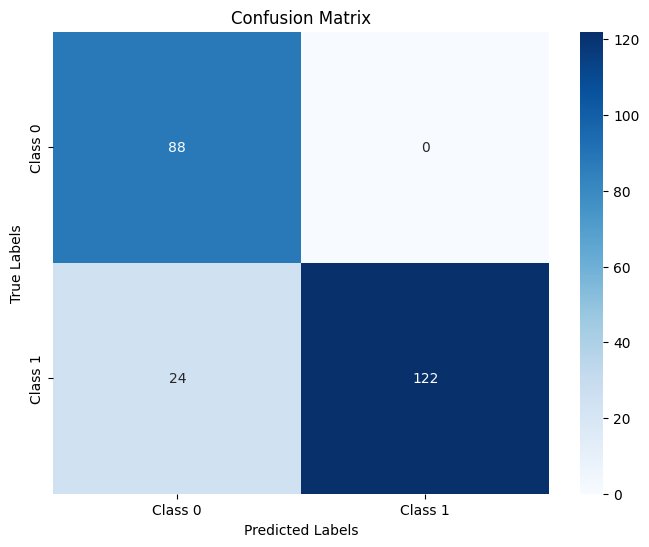

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions
Y_pred_probs = model.predict(X_test_feature)
Y_pred = (Y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(Y_test_labels, Y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy vs. epoch and loss vs. epoch for both training and validation
# Access the history object returned by model.fit()

# Plot Accuracy vs Epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss vs Epoch
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def visualize_segmentations(original_images, ground_truth_masks, predicted_masks, num_images=5):
    plt.figure(figsize=(15, 5 * num_images))

    for i in range(num_images):
        # Original Image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        # Ground Truth Mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(ground_truth_masks[i], cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # Predicted Mask
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predicted_masks[i], cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

    plt.tight_layout()
    plt.show()